In [1]:
import os
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

DATASET_DIR = r"C:\Users\ACER\Downloads\archive (5)\Grapevine_Leaves_Image_Dataset"
IMG_SIZE = (128, 128)
BATCH = 32
EPOCHS = 10
VAL_SPLIT = 0.2
SAVE_AUG_PER_CLASS = 20
AUG_DIR = DATASET_DIR + "_AUG"
MERGED_DIR = DATASET_DIR + "_MERGED"

gen_orig = ImageDataGenerator(rescale=1 / 255.0, validation_split=VAL_SPLIT)

train_orig = gen_orig.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)

val_orig = gen_orig.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
)

print("\nTraining images (Original):", train_orig.samples)
print("Validation images (Original):", val_orig.samples)

def build_model(num_classes):
    model = models.Sequential(
        [
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D(2, 2),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

num_classes = len(train_orig.class_indices)

model_orig = build_model(num_classes)
history_orig = model_orig.fit(train_orig, epochs=EPOCHS, validation_data=val_orig)

os.makedirs(AUG_DIR, exist_ok=True)
classes = [cls for cls in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, cls))]

for cls in classes:
    cls_dir = os.path.join(DATASET_DIR, cls)
    cls_aug_dir = os.path.join(AUG_DIR, cls)
    os.makedirs(cls_aug_dir, exist_ok=True)

    aug = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.7, 1.3],
    )

    flow = aug.flow_from_directory(
        DATASET_DIR,
        classes=[cls],
        target_size=IMG_SIZE,
        batch_size=1,
        save_to_dir=cls_aug_dir,
        save_prefix="aug",
        class_mode=None,
        shuffle=True,
    )

    for _ in range(SAVE_AUG_PER_CLASS):
        next(flow)

print("\nAll augmented images saved!")

if os.path.exists(MERGED_DIR):
    shutil.rmtree(MERGED_DIR)

shutil.copytree(DATASET_DIR, MERGED_DIR)

for cls in classes:
    aug_cls_dir = os.path.join(AUG_DIR, cls)
    merged_cls_dir = os.path.join(MERGED_DIR, cls)
    for f in os.listdir(aug_cls_dir):
        shutil.copy(os.path.join(aug_cls_dir, f), merged_cls_dir)

print("Merged dataset created at:", MERGED_DIR)

gen_merged = ImageDataGenerator(rescale=1 / 255.0, validation_split=VAL_SPLIT)

train_merged = gen_merged.flow_from_directory(
    MERGED_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)

val_merged = gen_merged.flow_from_directory(
    MERGED_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
)

model_aug = build_model(num_classes)
history_aug = model_aug.fit(train_merged, epochs=EPOCHS, validation_data=val_merged)

print("\n=== Accuracy Comparison ===")
print(f"Original Only - Train Accuracy: {max(history_orig.history['accuracy']):.4f}")
print(f"Original Only - Val Accuracy  : {max(history_orig.history['val_accuracy']):.4f}")
print(f"With Augmentation - Train Accuracy: {max(history_aug.history['accuracy']):.4f}")
print(f"With Augmentation - Val Accuracy  : {max(history_aug.history['val_accuracy']):.4f}")


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.

Training images (Original): 400
Validation images (Original): 100


c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2183 - loss: 1.7398 - val_accuracy: 0.2000 - val_loss: 1.6107
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.2425 - loss: 1.6070 - val_accuracy: 0.2300 - val_loss: 1.6022
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.3232 - loss: 1.5798 - val_accuracy: 0.2000 - val_loss: 1.6873
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.2906 - loss: 1.5858 - val_accuracy: 0.2400 - val_loss: 1.6091
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.3299 - loss: 1.4899 - val_accuracy: 0.2700 - val_loss: 1.5994
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.4203 - loss: 1.4220 - val_accuracy: 0.3400 - val_loss: 1.6457
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.5018 - loss: 1.2759 - val_accuracy: 0.3200 - val_loss: 1.6866
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5756 - loss: 1.0717 - val_accuracy: 0.38

c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 876ms/step - accuracy: 0.1968 - loss: 1.7289 - val_accuracy: 0.2333 - val_loss: 1.6014
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.3308 - loss: 1.5743 - val_accuracy: 0.2083 - val_loss: 1.6039
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.3630 - loss: 1.5047 - val_accuracy: 0.2583 - val_loss: 1.5592
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.4582 - loss: 1.3646 - val_accuracy: 0.2917 - val_loss: 1.5940
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.5456 - loss: 1.0925 - val_accuracy: 0.3250 - val_loss: 1.6315
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.6770 - loss: 0.9174 - val_accuracy: 0.4250 - val_loss: 1.8991
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.7470 - loss: 0.7138 - val_accuracy: 0.3417 - val_loss: 1.6708
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.7481 - loss: 0.7242 - val_accuracy: 0

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Training images: 1027
Testing images : 256


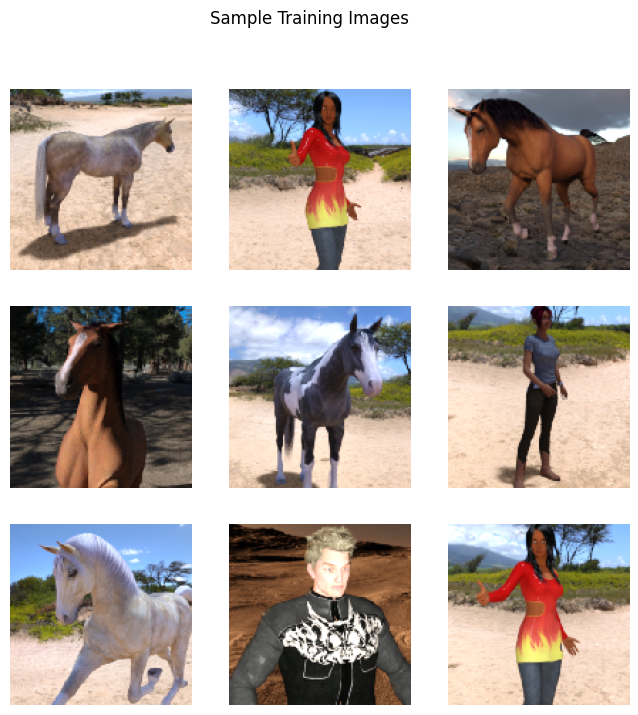

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5308 - loss: 0.7156 - val_accuracy: 0.8242 - val_loss: 0.5046
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 673ms/step - accuracy: 0.6833 - loss: 0.6227 - val_accuracy: 0.8555 - val_loss: 0.4108
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 597ms/step - accuracy: 0.7263 - loss: 0.5759 - val_accuracy: 0.8477 - val_loss: 0.3755
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 597ms/step - accuracy: 0.7220 - loss: 0.5585 - val_accuracy: 0.8516 - val_loss: 0.3431
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 672ms/step - accuracy: 0.7572 - loss: 0.5181 - val_accuracy: 0.8477 - val_loss: 0.3478
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 637ms/step - accuracy: 0.7665 - loss: 0.4865 - val_accuracy: 0.8477 - val_loss: 0.3468
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/step - accuracy: 0.8146 - loss: 0.4750 - val_accuracy: 0.8438 - val_loss: 0.3585
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 621ms/step - accuracy: 0.8276 - loss: 0.4321 - val_accurac

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

train_dir = r"C:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\horse-or-human\train"
test_dir  = r"C:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\horse-or-human\validation"

train_gen = ImageDataGenerator(
    rescale=1/255.0
)

test_gen = ImageDataGenerator(rescale=1/255.0)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

print("Training images:", train_data.samples)
print("Testing images :", test_data.samples)

x, y = next(train_data)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()

def build_resnet():
    base = tf.keras.applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_shape=(128,128,3)
    )
    base.trainable = False 

    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dense(2, activation="sigmoid")
    ])

    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_resnet()
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

print("Train Accuracy:", max(history.history['accuracy']))
print("Test Accuracy :", max(history.history['val_accuracy']))


In [7]:
import os
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

TRAIN_DIR = r"C:\Users\ACER\Downloads\archive (7)\Fruits Classification\train"
TEST_DIR  = r"C:\Users\ACER\Downloads\archive (7)\Fruits Classification\test"

AUG_DIR = TRAIN_DIR + "_AUG"
MERGED_DIR = TRAIN_DIR + "_MERGED"

IMG_SIZE = (128, 128)
BATCH = 32
SAVE_AUG_PER_CLASS = 20 
EPOCHS = 10

gen_orig = ImageDataGenerator(rescale=1 / 255.0)
train_orig = gen_orig.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH, class_mode="categorical"
)
test_orig = gen_orig.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH, class_mode="categorical"
)

print("\nOriginal Training images:", train_orig.samples)
print("Original Testing images :", test_orig.samples)

def build_cnn(num_classes):
    model = models.Sequential(
        [
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D(2, 2),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D(2, 2),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


num_classes = len(train_orig.class_indices)

model_orig = build_cnn(num_classes)
history_orig = model_orig.fit(train_orig, validation_data=test_orig, epochs=EPOCHS)

os.makedirs(AUG_DIR, exist_ok=True)
classes = sorted(
    [d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))]
)

for cls in classes:
    class_input_path = os.path.join(TRAIN_DIR, cls)
    class_aug_path = os.path.join(AUG_DIR, cls)
    os.makedirs(class_aug_path, exist_ok=True)

    gen = ImageDataGenerator(
        rotation_range=25,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.7, 1.3],
    )

    flow = gen.flow_from_directory(
        TRAIN_DIR,
        classes=[cls],
        target_size=IMG_SIZE,
        batch_size=1,
        save_to_dir=class_aug_path,
        save_prefix="aug",
        class_mode=None,
    )

    print(f"Generating {SAVE_AUG_PER_CLASS} images for class: {cls}")
    for _ in range(SAVE_AUG_PER_CLASS):
        next(flow)

print("Done generating augmented images!")

if os.path.exists(MERGED_DIR):
    shutil.rmtree(MERGED_DIR)

shutil.copytree(TRAIN_DIR, MERGED_DIR)

for cls in classes:
    aug_class_path = os.path.join(AUG_DIR, cls)
    merged_class_path = os.path.join(MERGED_DIR, cls)
    for f in os.listdir(aug_class_path):
        shutil.copy(os.path.join(aug_class_path, f), merged_class_path)

print("Merged dataset created at:", MERGED_DIR)

gen_merged = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.2)
train_merged = gen_merged.flow_from_directory(
    MERGED_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="training",
)
test_merged = gen_merged.flow_from_directory(
    MERGED_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="categorical",
    subset="validation",
)

model_aug = build_cnn(num_classes)
history_aug = model_aug.fit(train_merged, validation_data=test_merged, epochs=EPOCHS)

print("\n=== Accuracy Comparison ===")
print(f"Original Only - Train Accuracy: {max(history_orig.history['accuracy']):.4f}")
print(
    f"Original Only - Test Accuracy : {max(history_orig.history['val_accuracy']):.4f}"
)
print(f"With Augmentation - Train Accuracy: {max(history_aug.history['accuracy']):.4f}")
print(
    f"With Augmentation - Test Accuracy : {max(history_aug.history['val_accuracy']):.4f}"
)


Found 9700 images belonging to 5 classes.
Found 100 images belonging to 5 classes.

Original Training images: 9700
Original Testing images : 100
Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 280s 913ms/step - accuracy: 0.3924 - loss: 1.3496 - val_accuracy: 0.5700 - val_loss: 1.0128
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 68s 223ms/step - accuracy: 0.6121 - loss: 0.9695 - val_accuracy: 0.6600 - val_loss: 0.8783
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.6730 - loss: 0.8234 - val_accuracy: 0.6700 - val_loss: 0.8071
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 60s 197ms/step - accuracy: 0.7343 - loss: 0.6899 - val_accuracy: 0.6800 - val_loss: 0.8721
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 61s 202ms/step - accuracy: 0.7881 - loss: 0.5609 - val_accuracy: 0.6300 - val_loss: 1.0441
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 61s 200ms/step - accuracy: 0.8648 - loss: 0.3777 - val_accuracy: 0.7100 - val_loss: 0.9785
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 64s 211ms/step - accuracy: 0

Training images : 50000
Testing images  : 10000


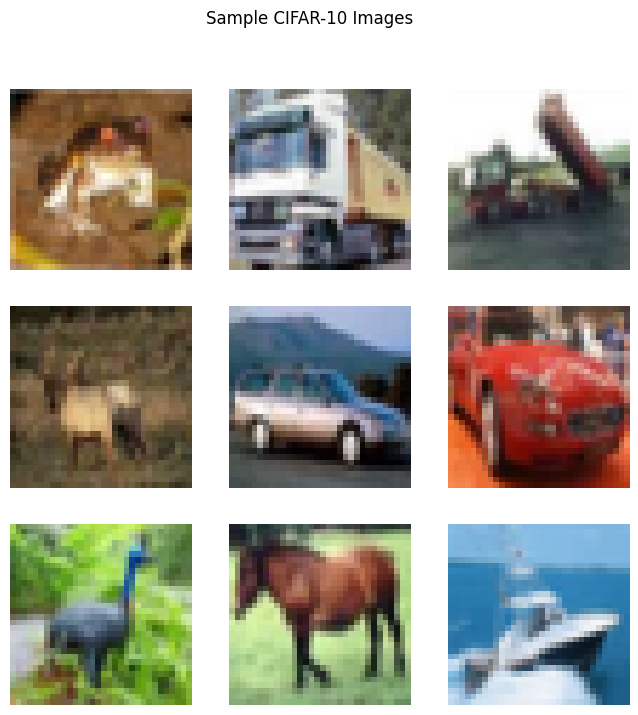

c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training ANN on CIFAR-10...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.2923 - loss: 2.0022 - val_accuracy: 0.3591 - val_loss: 1.7843
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3825 - loss: 1.7371 - val_accuracy: 0.4154 - val_loss: 1.6481
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4079 - loss: 1.6658 - val_accuracy: 0.3986 - val_loss: 1.6795
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4150 - loss: 1.6340 - val_accuracy: 0.4004 - val_loss: 1.6621
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4308 - loss: 1.5930 - val_accuracy: 0.4170 - val_loss: 1.6523
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4427 - loss: 1.5654 - val_accuracy: 0.4286 - val_loss: 1.6066
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4424 - loss: 1.5559 - val_accuracy: 0.4354 - val_loss: 1.5942
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step

c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN on CIFAR-10...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4059 - loss: 1.6257 - val_accuracy: 0.5595 - val_loss: 1.2414
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6172 - loss: 1.0927 - val_accuracy: 0.6483 - val_loss: 1.0187
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6719 - loss: 0.9368 - val_accuracy: 0.6700 - val_loss: 0.9707
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7118 - loss: 0.8358 - val_accuracy: 0.6922 - val_loss: 0.9059
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7362 - loss: 0.7534 - val_accuracy: 0.6853 - val_loss: 0.9142
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7641 - loss: 0.6860 - val_accuracy: 0.7079 - val_loss: 0.8663
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7832 - loss: 0.6210 - val_accuracy: 0.7043 - val_loss: 0.8863
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 1

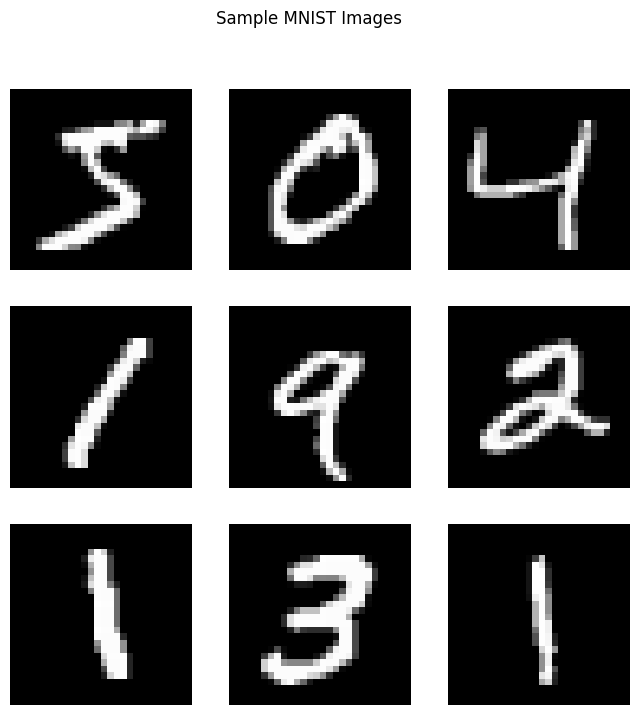

c:\Users\ACER\Documents\College\7thSem\ImageProcessingLab\imglab\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training ANN on MNIST...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8814 - loss: 0.4241 - val_accuracy: 0.9604 - val_loss: 0.1308
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9633 - loss: 0.1244 - val_accuracy: 0.9684 - val_loss: 0.1013
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0824 - val_accuracy: 0.9717 - val_loss: 0.0956
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9873 - loss: 0.0431 - val_accuracy: 0.9752 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9786 - val_loss: 0.0752
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9795 - val_loss: 0.0725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accurac

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training images :", x_train.shape[0])
print("Testing images  :", x_test.shape[0])

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

x_train = x_train / 255.0
x_test  = x_test / 255.0

y_train_flat = y_train.reshape(-1)
y_test_flat  = y_test.reshape(-1)

ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

ann.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

print("\nTraining ANN on CIFAR-10...")
history_ann = ann.fit(x_train, y_train_flat, epochs=10,
                      validation_data=(x_test, y_test_flat))

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

print("\nTraining CNN on CIFAR-10...")
history_cnn = cnn.fit(x_train, y_train_flat, epochs=10,
                      validation_data=(x_test, y_test_flat))

# MNIST
(m_train, ml_train), (m_test, ml_test) = datasets.mnist.load_data()

print("Training images :", m_train.shape[0])
print("Testing images  :", m_test.shape[0])

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(m_train[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample MNIST Images")
plt.show()

m_train = m_train / 255.0
m_test  = m_test / 255.0

m_train_flat = m_train.reshape((m_train.shape[0], -1))
m_test_flat  = m_test.reshape((m_test.shape[0], -1))

mnist_ann = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

mnist_ann.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("\nTraining ANN on MNIST...")
hist_mnist_ann = mnist_ann.fit(m_train_flat, ml_train, epochs=10,
                               validation_data=(m_test_flat, ml_test))

m_train_cnn = m_train.reshape(-1, 28, 28, 1)
m_test_cnn  = m_test.reshape(-1, 28, 28, 1)

mnist_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

mnist_cnn.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("\nTraining CNN on MNIST...")
hist_mnist_cnn = mnist_cnn.fit(
    m_train_cnn, ml_train, epochs=10,
    validation_data=(m_test_cnn, ml_test)
)

